In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
import pickle
from random import randint

In [234]:
# Training Data
val_temp = np.random.normal(25, 5, 1000)
val_hum = np.random.normal(60, 5, 1000)
val_vol = np.random.normal(100, 10, 1000)
data = np.column_stack((val_temp, val_hum, val_vol))

In [235]:
# Train an Isolation Forrest
isof = IsolationForest(random_state=0, contamination=0.05).fit(data)

# Create a DataFrame
df = {'Temperature': val_temp, 'Humidity': val_hum, 'Volume': val_vol}
df = pd.DataFrame(data=df)

# Predict the labels and add them to the DataFrame
df['outlier'] = isof.predict(data)

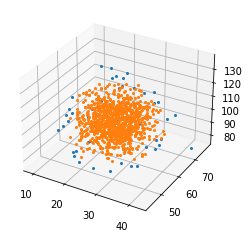

In [236]:
# Group data by labels
groups = df.groupby('outlier')

# Create a 3D Scatterplot
ax = plt.axes(projection='3d')
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, group.Volume, marker='o', linestyle='', markersize=2)

In [237]:
# Save the model
pickle.dump(isof, open('isof.model', 'wb'))